In [ ]:
# импортируем необходимые модули

import pandas as pd

Прочитаем файл с данными с диска

Описание данных можно посмотреть здесь: https://huggingface.co/datasets/marriamaslova/toxic_dvach

In [ ]:
df = pd.read_csv("data/labeled.csv") 

In [ ]:
# смотрим на первые 5 строк
# здесь видно, что перед нами задача классификации
df.head()

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1.0
1,"Хохлы, это отдушина затюканого россиянина, мол...",1.0
2,Собаке - собачья смерть\n,1.0
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1.0
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1.0


In [ ]:
# изучим данные, для начала посмотрим на распределение таргетов в колонке toxic.
# колонку в pandas можно выбрать вот так через точку или как строковое значение в квадратных скобках
df.toxic.value_counts()

toxic
0.0    9586
1.0    4826
Name: count, dtype: int64

In [ ]:
# пример, как можно выбрать колонку иначе
# так обычно делают, когда название колонки не написано на английском в одно слово/строку без пробелов (обычно тогда пробел заменяют нижним подчеркиванием)
df['toxic'].value_counts()

toxic
0.0    9586
1.0    4826
Name: count, dtype: int64

In [ ]:
# аргумент normalize позволяет нам посмотреть на долю каждого класса
# видно, что перед нами небольшой дисбаланс классов

df['toxic'].value_counts(normalize=True)

toxic
0.0    0.66514
1.0    0.33486
Name: proportion, dtype: float64

<Axes: ylabel='proportion'>

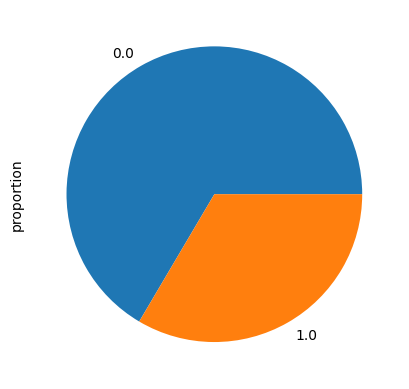

In [ ]:
# а еще можно вот так визуализировать, для этого мы как раз ставили библиотеку matplotlib
df['toxic'].value_counts(normalize=True).plot(kind='pie')

In [ ]:
# проверим датасет на пустые строки
# важно, что тут учитываются как обычные null, так и пустые строки '', а также null специфичные для pandas и numpy
df.isna().sum()

comment    0
toxic      0
dtype: int64

In [ ]:
#  проверим датасет на дубли
#  это более fancy вариант, обычно делают так, как ниже

df.duplicated().sum()

np.int64(0)

In [ ]:
# почему можно так? потому что методы drop_duplicates и drop_na не будут модифицировать датасет inplace, то есть в рамках той же ячейки памяти
len(df), len(df.drop_duplicates())

(14412, 14412)

Посмотрим на конкретные примеры из данных, чтобы понять, что у нас все ок с разметкой. Для этого отфильтруем по нужному классу: в квадратных скобках пропишем собственно условие, что таргет toxic равен 1 или 0. `df.toxic == 1` создает колонку с булевыми занчениями (true/false), по которым мы можем отфильтровать все false. Метод sample берет n случайных элементов, а `random_state` фиксирует псевдорандомное значение для воспроизводимости


Чтобы проитерироваться по датасету воспользуемся методом `iterrows`. Он возвращает индекс ряда в датасете и непосредственно ряд в формате словаря (ключ-значение)

In [25]:
df_sample = df[df.toxic == 1].sample(n=5, random_state=42) 

for i, row in df_sample.iterrows():
    print(i)
    print(row['comment'])
    print(row['toxic'])
    print()

975
Ебать, кто смотрит сыромятникова?? Где еще можно найти настолько отталкивающий тембр голоса и манеру говорить?? Блять а полезный контент в стиле - сейчас я покажу как играть на гитаре с автотюном - который уже давно был у западников? А его охуенные видео как сделать песдатый звук, где звук выхожит полным мутным говном, потому что он напрямую в дешевую звуковую карту играет? А его бородка ебаная?? Что это блять? А блять когда он палится с подложенной аудиодорожкой когда играет на камеру, причём блять настолько нелепо, что даже видео заметно замедляет, чтобы попадало в звук, а потом говорит, что так оно все и задумано? А его блять гиперкривляния и гримасы во время игры?? Что это за пиздец? Видно же, что специально старается показать ДУШУ , которой у него на самом деле нет!! Блять у меня такой испанский стыд со всей этой хуйни ебаный в рот! Теперь еще у него будет ебанутая истеричка-жена, которая его уже загнала под неебический каблук, и будет его уничтожать окончательно. Бляя она тож

In [26]:
df_sample = df[df.toxic == 0].sample(n=5, random_state=42) 

for i, row in df_sample.iterrows():
    print(i)
    print(row['comment'])
    print(row['toxic'])
    print()

8481
Где этот город, в котором за 60к можно работать на одной работе? Тут на 3 ишачишь, и 50к еле еле

0.0

7374
У кого-то было ооочень много свободного времени

0.0

153
Ага, но если посмотреть на историю региона чуть раньше то будет так: Русские подружились с черкесами. Русские перестали дружить с черкесами, после их нападений. Соседи осознают, что какая-то хрень пошла, просят защиты у России. Черкесы и чеченцы начинают грабят соседей и входят во вкус, формируется кодекс чести набегов на соседей и целая набеговая система. Россия переселяет казаков на границу. Черкесы и чеченцы начинают грабить и убивать казаков, при этом активно занимаются и междуусобными войнами. Терпение России заканчивается, кавказцы слегка получают по голове. Кавказцы не унимаются и получают поддержку от врагов России (османов и англичан) и отрабатывают её. Терпение России заканчивается и черкесы получают по полной. Остатки черкесов более 150 лет удивляются и обижаются, а нас-то за шо? Раз уж лезть в историю, то 

-----
## Построение бейзлайна

Работа над любым проектом начинается с бейзлайна -- простейшего работающего решения, которое мы потом будем улучшать. Он служит нам еще и для того, чтобы понимать, с какой точки мы стартуем, чтобы оценивать необходимость различных усложнений. Например, если у вас качество на бейзлайне на целевой метрике около 0.95, то стоит задуматься, нужны ли нейронки, в принципе. 

Для задач классификации в NLP бейзлайн обычно состоит из векторизации с помощью tf-idf и непосредственной модели в виде логистической регрессии. Важный момент: в NLP мы практически всегда вынуждены начинать работу над моделяи с выбора способа векторизации текста, так как машинное обучение умеет работать с матрицами, а не строками. 

### Что такое tf-idf векторизация?

По сути это представления каждого токена в тексте как term frequency * inverse document frequency (иногда логарифм от inverse document frequency). То есть частота токена в конкретном тексте умножается на обратную частоту этого же токета в текстах (то есть долю текстов, где он встретился, но перевернутую). 

Дело в том, что слова обычно не распределены равномерно. Скорее у нас есть часть служебных частей речи, которая используется супер-часто, есть слова частотные для повседневной речи (средняя частотность) и что-то суперспецифическое (редкое). Такое распределение также называется законом Ципфа. То есть, как видно на картинке ниже, у нас есть голова, которая нам мешает, тушка, с которой мы бы хотели работать, и хвост, с которым работать полезно, но сложно. 

![img.png](images/zipfian-reference.jpg)

Добавление inverse document frequency как раз и позволяет нам отнормировать все на то, насколько специфично слово для нашего корпуса. А теперь посмотрим на то, как строить матрицу tf-idf руками.

Подробнее почитать про tf-idf векторизацию можно тут:
https://medium.com/analytics-vidhya/demonstrating-calculation-of-tf-idf-from-sklearn-4f9526e7e78b

In [ ]:
# возьмем два текста из нашего корпуса

text1 = "Проблема скорее во взаимопонимании. Они же могут все обсудить, все всех устроит, у них будет какой-то план и они будут его придерживаться, и все равно жаловаться. Люди должны быть адекватные."
text2 = "почему? Логика следующая - в фокусе центр,а чем дальше от зрителя и чем ближе к зрителю,то расфокус увеличивается"

In [ ]:
# Разобьем тексты на слова по пробелам и приведем все слова к нижнему регистру, чтобы лишний раз не множить токены.
# Обычно также убирают знаки препинания, но мы рассмотрим самый простой вариант
# функция lambda позволяет нам создать ситуативную функцию, такая конструкция часто может встречаться для несложной предобработки данных
# map позволяет параллельно исполнить эту функцию на всех элементах iterable объекта

words1 = list(map(lambda x: x.lower(), text1.split()))
words2 = list(map(lambda x: x.lower(), text2.split()))

In [ ]:
# Построим словарь частотности слов для первого текста
# Такие словари нам нужны для каждого текста, так как частота слов (первый компонент) считается относительно каждого текста, 
# а не корпуса текстов в целом

freq_dictionary = {}

for word in words1:
    freq_dictionary[word.lower()] = freq_dictionary.get(word.lower(), 0) + 1

In [ ]:
# посмотрим на получившуюся таблицу 
# поскольку мы считали итеративно, то у нас получились абсолютные частоты, которые мы потом должны будем отнормировать на кол-во слов в тексте

freq_dictionary 

In [ ]:
# построим словарь частотности упоминания слов в документах
# его мы строим для всех слов вообще, так что нужно сначала объединить все слова в один set

words_set = set(words1 + words2)
len(words_set)

In [ ]:
# тут у нас тоже абсолюты, но так как частота обратная, нам надо будет просто разделить кол-во текстов на каждую из частот

doc_freq_dict = {}

for word in words_set:
    cnt = 0
    
    if word in words1:
        cnt += 1

    if word in words2:
        cnt += 1

    doc_freq_dict[word] = cnt
doc_freq_dict

In [ ]:
# Далее мы вспоминаем, что нам надо получить-таки матрицу.
# Это значит, что мы не просто заменяем каждое слово в строке на его значение tfidf, 
# но делаем полноценную прямоугольную матрицу кол-во слов на кол-во документов.
# Также важно, чтобы наши слова были в едином порядке для всех текстов, так что составим маппинг из слов в индексы

word2ind = {}

for word in words_set:
    word2ind[word] = len(word2ind)

word2ind
text1_vec = [0 for x in range(len(word2ind))]

In [ ]:
# И, наконец, рассчитаем tfidf для первого текста

num_texts = 2

for k, v in freq_dictionary.items():
    text1_vec[word2ind[k]] = v / len(words1) * ( num_texts /doc_freq_dict[k] )
text1_vec

----

In [ ]:
# А теперь посмотрим, как это делается в промышленном масштабе. Импортируем класс TfidfVectorizer из scikit-learn
# У него есть три метода, которые нас интересуют: fit, transform и их комбинация fit_transform
# fit предрасчитывает частоты слов для каждого текста и обратную частоту встречаемости этих слов в документах
# transform же просто переводит каждый текст в вектор
# У нас довольно много разных уникальных слов в текстах
# (что нормально, так как сюда входит как лексическое разнообразие, так и грамматические формы), поэтому в матрице много нулей, такую еще называют sparse matrix.
# Чтобы не положить оперативную память, эти нули обычно не хранят в памяти

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit_transform(df['comment'])
